In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train2.csv",encoding='ISO-8859-1'  )

In [3]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
df.drop(columns=['textID','Country'],axis=1,inplace=True)

In [5]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              27480 non-null  object 
 1   selected_text     27480 non-null  object 
 2   sentiment         27481 non-null  object 
 3   Time of Tweet     27481 non-null  object 
 4   Age of User       27481 non-null  object 
 5   Population -2020  27481 non-null  int64  
 6   Land Area (Km²)   27481 non-null  float64
 7   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ MB


In [7]:
df.isnull().sum()

text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [8]:
df.dropna(subset=['text','selected_text'],inplace=True)

In [9]:
df.isnull().sum()

text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [10]:
df.shape

(27480, 8)

In [11]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

In [12]:
texts = df['text'].astype(str).tolist()
labels = df['sentiment'].tolist()

In [13]:
# Encode labels to numbers: Positive → 2, Neutral → 1, Negative → 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [14]:
# For categorical output
from tensorflow.keras.utils import to_categorical
y = to_categorical(encoded_labels)

2025-04-16 18:11:17.949963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744827077.964252   19316 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744827077.968438   19316 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744827077.980747   19316 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744827077.980767   19316 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744827077.980769   19316 computation_placer.cc:177] computation placer alr

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token = '<nothing>')

In [16]:
tokenizer.fit_on_texts(texts)

In [17]:
# tokenizer.word_index

In [18]:
# tokenizer.word_counts

In [19]:
len(tokenizer.word_index)

26599

In [20]:
tokenizer.document_count

27480

In [21]:
sequences = tokenizer.texts_to_sequences(texts)
# sequences

In [22]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
X = sequences

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train

array([[  88,   93,   13, ...,    0,    0,    0],
       [  89,   12,  225, ...,    0,    0,    0],
       [ 159,  179,   27, ...,    0,    0,    0],
       ...,
       [  42,  152,   64, ...,    0,    0,    0],
       [   5,   12, 2790, ...,    0,    0,    0],
       [6539,   47,    4, ...,    0,    0,    0]], dtype=int32)

In [25]:
X_train.shape

(21984, 35)

In [26]:
len(X_train[2])

35

In [27]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
from tensorflow.keras.layers import LSTM,Dropout
from keras.regularizers import l2

In [28]:
model = Sequential()
model.add(Embedding(input_dim=26599, output_dim=64))  # No input_length!
model.add(LSTM(64, dropout=0.3,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Build the model manually to allow summary to work
model.build(input_shape=(None, 35))  # assuming input sequences are padded to length 100

# Now this will work properly
model.summary()


I0000 00:00:1744827080.247158   19316 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 35, 64)         │     1,702,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,735,555 (6.62 MB)

 Trainable params: 1,735,555 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
  1/687 ━━━━━━━━━━━━━━━━━━━━ 22:46 2s/step - accuracy: 0.1875 - loss: 1.0979

I0000 00:00:1744827083.006140   19382 cuda_dnn.cc:529] Loaded cuDNN version 90300


687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4022 - loss: 1.0857 - val_accuracy: 0.6255 - val_loss: 0.8323
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6566 - loss: 0.7938 - val_accuracy: 0.6912 - val_loss: 0.7452
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7882 - loss: 0.5761 - val_accuracy: 0.7058 - val_loss: 0.7091
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8446 - loss: 0.4516 - val_accuracy: 0.7014 - val_loss: 0.7290
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8809 - loss: 0.3611 - val_accuracy: 0.6921 - val_loss: 0.7952


In [30]:
loss, acc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {acc:.2f}")

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6979 - loss: 0.7844


In [31]:
pred = model.predict(sequences)
print(pred)

859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[[0.02507478 0.90333146 0.07159373]
 [0.9869609  0.01061267 0.00242635]
 [0.96436423 0.03027616 0.00535958]
 ...
 [0.00219967 0.01848405 0.9793163 ]
 [0.00807137 0.09058002 0.9013486 ]
 [0.00186206 0.01603673 0.98210126]]


In [32]:
len(pred)

27480

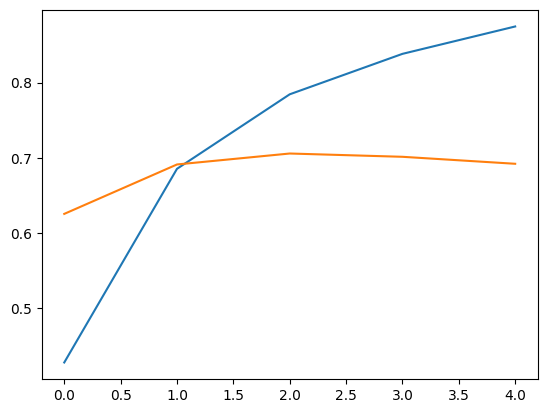

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])        

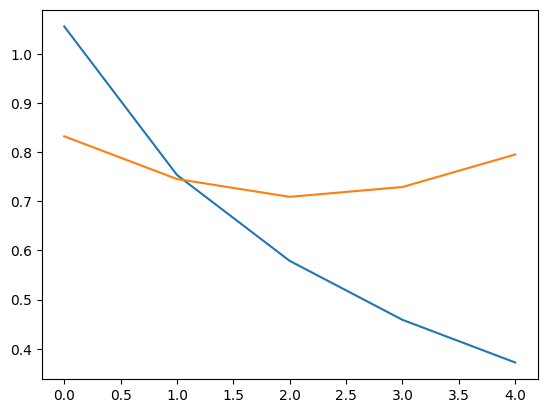

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   

In [ ]:
# import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# import re

# # Load the dataset
# df = pd.read_csv("sentiment_analysis.csv")

# # Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')

# # Initialize stopwords and stemmer
# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()

# # Preprocessing function
# def preprocess_text(text):
#     # Convert to lowercase
#     text = text.lower()
#     # Remove punctuation and numbers
#     text = re.sub(r'[^a-z\s]', '', text)
#     # Tokenize
#     tokens = word_tokenize(text)
#     # Remove stopwords and apply stemming
#     filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
#     return ' '.join(filtered_tokens)

# # Apply preprocessing
# df['Cleaned_Tweet'] = df['Tweet'].astype(str).apply(preprocess_text)

# # Preview
# print(df[['Tweet', 'Cleaned_Tweet', 'Sentiment']].head())


In [ ]:
# # STEP 0: IMPORT LIBRARIES
# import pandas as pd
# import numpy as np
# import nltk
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from gensim.models import Word2Vec
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# # STEP 1: LOAD DATA
# df = pd.read_csv("sentiment_analysis.csv")

# # STEP 2: TEXT PREPROCESSING
# nltk.download('punkt')
# nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     text = text.lower()
#     text = re.sub(r'[^a-z\s]', '', text)
#     tokens = word_tokenize(text)
#     filtered = [stemmer.stem(w) for w in tokens if w not in stop_words]
#     return ' '.join(filtered)

# df['Cleaned_Tweet'] = df['Tweet'].astype(str).apply(preprocess_text)

# # STEP 3: ENCODING LABELS
# label_encoder = LabelEncoder()
# df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])

# # STEP 4A: TF-IDF VECTORIZATION
# tfidf = TfidfVectorizer(max_features=5000)
# X_tfidf = tfidf.fit_transform(df['Cleaned_Tweet']).toarray()

# # STEP 4B: WORD2VEC EMBEDDING + SEQUENCES FOR LSTM
# tokenized_text = [text.split() for text in df['Cleaned_Tweet']]
# word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1)
# word2vec_model.train(tokenized_text, total_examples=len(tokenized_text), epochs=10)

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['Cleaned_Tweet'])
# sequences = tokenizer.texts_to_sequences(df['Cleaned_Tweet'])

# # Padding sequences
# X_seq = pad_sequences(sequences, maxlen=100)

# # Word index and embedding matrix
# word_index = tokenizer.word_index
# embedding_matrix = np.zeros((len(word_index) + 1, 100))
# for word, i in word_index.items():
#     if word in word2vec_model.wv:
#         embedding_matrix[i] = word2vec_model.wv[word]

# # STEP 5: SPLIT DATA
# y = df['Sentiment_Label']
# X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# # STEP 6: LSTM MODEL
# model = Sequential()
# model.add(Embedding(input_dim=len(word_index)+1, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(3, activation='softmax'))  # Assuming 3 sentiment classes

# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

# # STEP 7: TRAIN THE MODEL
# model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
